In [7]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from scipy.integrate import quad

t1 = np.arange(0, 1, 0.01)
th1 = (2 * t1)
th_past = 0

d_velocities_1 =[]
d_velocities_2 =[]


for th_t in th1:
    t=0.01
    radius = 5
    wheels_distance = 0.5
    wheel_diameter = 0.25 
    x1 = radius * np.cos(th_t)
    y1 = radius * np.sin(th_t)
    #plt.plot(x1, y1, 'ro', markersize=11) 
    th_change = th_t - th_past
    rate = th_change/t
    velocity_1 = rate*(radius - (wheels_distance/2)) 
    velocity_2 = rate*(radius + (wheels_distance/2)) 
    angular_velocity_1 = velocity_1/(wheel_diameter/2)
    angular_velocity_2 = velocity_2/(wheel_diameter/2)
    d_velocities_1.append(angular_velocity_1)
    d_velocities_2.append(angular_velocity_2)
    th_past = th_t

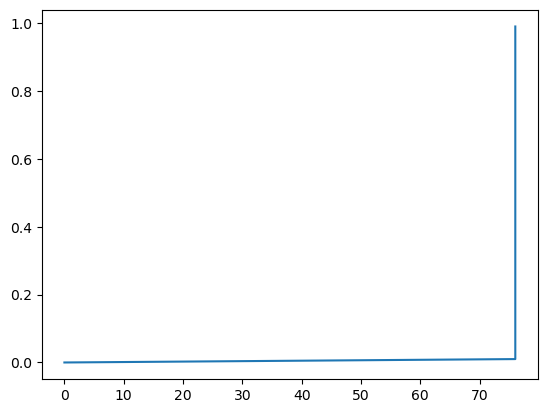

In [8]:
t = np.arange(0, 1, 0.01)
wheel_diameter = 0.25
plt.plot(d_velocities_1, t)
plt.show()

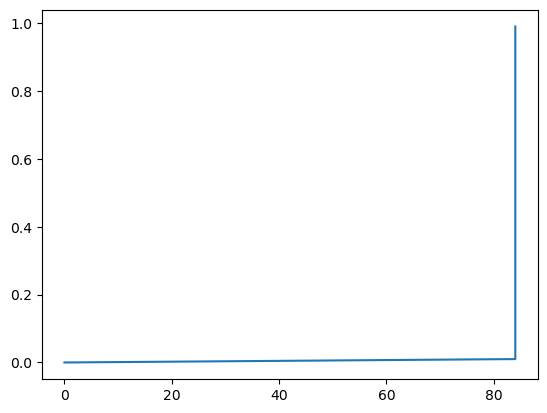

In [9]:
t = np.arange(0, 1, 0.01)
wheel_diameter = 0.25
plt.plot(d_velocities_2, t)
plt.show()

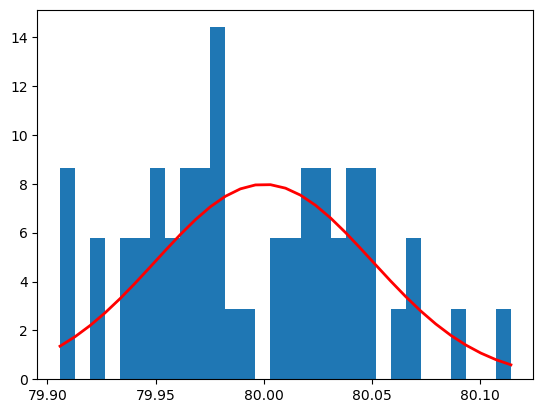

In [11]:
mu, sigma = (d_velocities_1[1]+d_velocities_2[1])/2, (wheels_distance)/10 # mean and standard deviation
s = np.random.normal(mu, sigma, 50)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

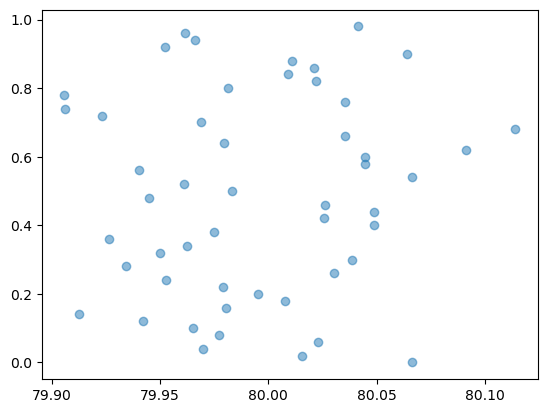

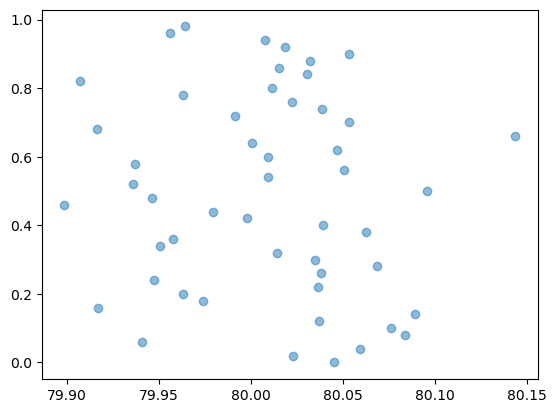

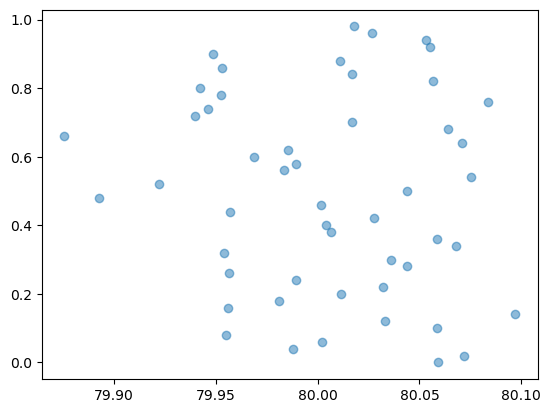

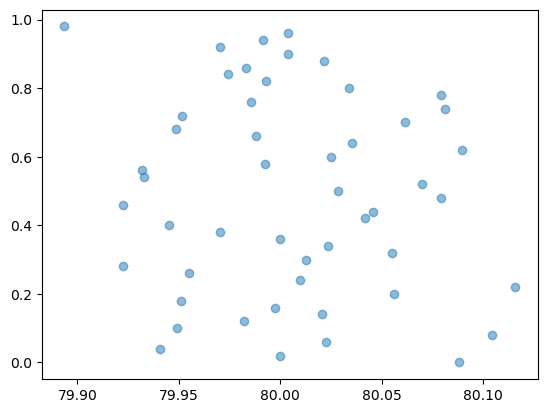

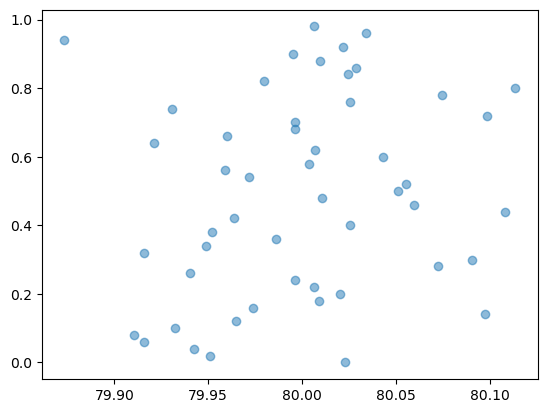

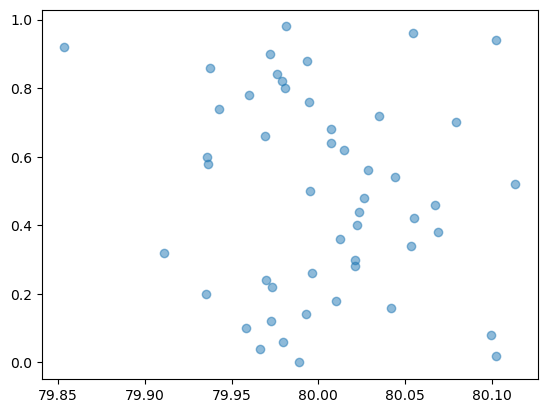

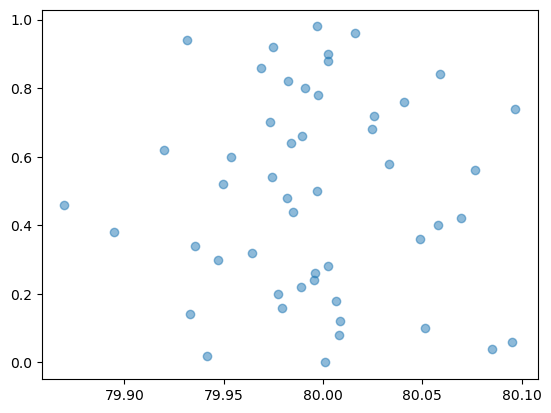

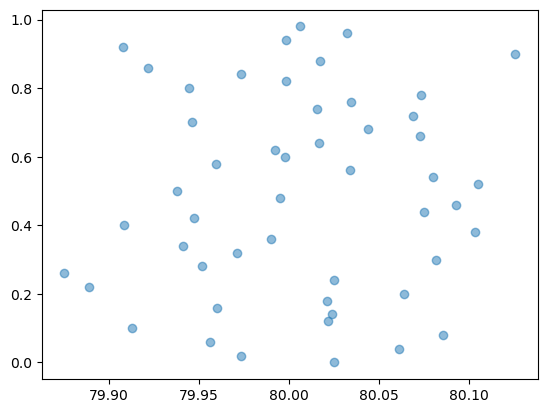

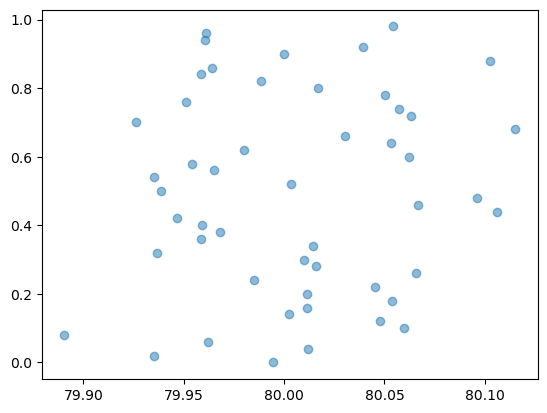

In [13]:
for i in range(1,10):
    d_velocity_1 = d_velocities_1[i] # for first iteration
    d_velocity_2 = d_velocities_2[i]
    mean = (d_velocity_1 + d_velocity_2)/2
    std_dev = (wheels_distance)/10

    mu, sigma = mean, std_dev # mean and standard deviation
    samples = np.random.normal(mu, sigma, 50)

    t = np.arange(0, 1, 0.02) 
    N = 50

    plt.scatter(samples, t, alpha=0.5)
    
    plt.show()

Moviepy - Building video simulation_video_1.mp4.
Moviepy - Writing video simulation_video_1.mp4



Moviepy - Done !
Moviepy - video ready simulation_video_1.mp4


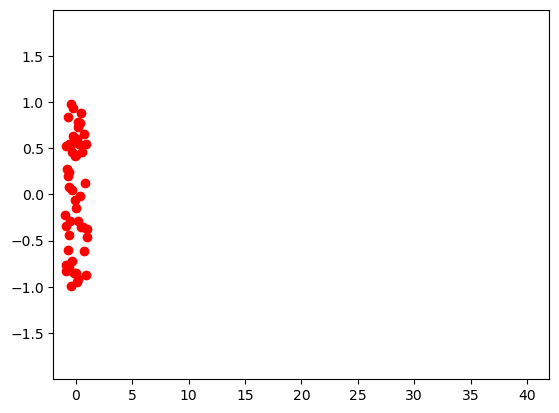

In [15]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import itertools

np.random.seed(42)
frames = 40

x = np.arange(frames)
y = np.sin(x)
colors = itertools.cycle(['red', 'red'])
data = [(np.random.uniform(-1, 1, 50) + x[i],
         np.random.uniform(-1, 1, 50) + y[i])
        for i in range(frames)]

fig, ax = plt.subplots()

s = ax.scatter([], [])

ax.set_xlim(-2, frames+2)
ax.set_ylim(min(y) - 1, max(y) + 1)

def update(i):
    s.set_offsets(np.column_stack([data[i][0], data[i][1]]))
    s.set_facecolor(next(colors))

ani = animation.FuncAnimation(fig, update, frames=frames, interval=100)
ani.save('simulation.gif', writer='pillow')
import moviepy.editor as mp
clip = mp.VideoFileClip('simulation.gif')
clip.write_videofile("simulation_video_1.mp4")